# Natural Language Processing for Analyzing violence against women texts

By Manuel Esteban Arias

Note: make sure that the documents have the following names:
  * "Essor".
  * "https-__www.un.org_fr_observances_ending-violence-against-women".
  * "La Federation nationale solidarite Femmes a analyse les donnees du 3919".
  * "Les mesures de protection pouvant etre prises par le juge civil".
  * "SEVE_044_0093".
  * "Violences faites aux femmes".

In [170]:
import PyPDF2
import re
from docx2python import docx2python
from striprtf.striprtf import rtf_to_text
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1.Data import and Cleaning

#### 1.1 PDFs import

In [171]:
#11:Essor
pdf1 = open('C:/Users/manue/Downloads/femmes/Essor.pdf', mode='rb')
pdf1 = PyPDF2.PdfReader(pdf1)
pdf1_pages = len(pdf1.pages)
pdf11=[]
for i in range(pdf1_pages):
    pageObj = pdf1.pages[i]
    pdf11.append(pageObj.extract_text())

pdf11=" ".join(str(x) for x in pdf11)
#We don't need the bibliography
text1 = pdf11.split("29Adler F., 1975,", 1)[0]
# cleaning  special characters
text1= re.sub('\n', '', text1)

In [172]:
#12: SEVE_044_0093
pdf2 = open('C:/Users/manue/Downloads/femmes/SEVE_044_0093.pdf', mode='rb')
pdf2 = PyPDF2.PdfReader(pdf2)
pdf2_pages = len(pdf2.pages)-1
#we don't need the frist page

pdf12=[]
for i in range(pdf2_pages):
    pageObj = pdf2.pages[1+ i]
    pdf12.append(pageObj.extract_text())
pdf12=" ".join(str(x) for x in pdf12)
# cleaning  special characters
text2= re.sub('\n', '', pdf12)

In [173]:
#13: Suis-je concernees
pdf3 = open('C:/Users/manue/Downloads/femmes/Suis-je concernees.pdf', mode='rb')
pdf3 = PyPDF2.PdfReader(pdf3)
pdf3_pages = len(pdf3.pages)

pdf13=[]
for i in range(pdf3_pages):
    pageObj = pdf3.pages[i]
    pdf13.append(pageObj.extract_text())
pdf13=" ".join(str(x) for x in pdf13)
# cleaning special characters
text3= re.sub('\n', '', pdf13)

In [174]:
#14: femmes/Violences faites aux femmes
pdf4 = open('C:/Users/manue/Downloads/femmes/Violences faites aux femmes.pdf', mode='rb')
pdf4 = PyPDF2.PdfReader(pdf4)
pdf4_pages = len(pdf4.pages)

pdf14=[]
for i in range(pdf4_pages):
    pageObj = pdf4.pages[i]
    pdf14.append(pageObj.extract_text())
pdf14=" ".join(str(x) for x in pdf14)
# cleaning  special characters
text4= re.sub('\n', '', pdf14)

#### 1.2 Words import

In [175]:
with docx2python('C:/Users/manue/Downloads/femmes/La Federation nationale solidarite Femmes a analyse les donnees du 3919.docx') as docx1:
    docx15=docx1.text
# cleaning special characters
docx15= re.sub('\n', '', docx15)
docx15= re.sub('\xa0', "'", docx15)
text5=re.sub("[\<\[].*?[\>\]]", "", docx15)

In [176]:
with docx2python('C:/Users/manue/Downloads/femmes/Les mesures de protection pouvant etre prises par le juge civil.docx') as docx2:
    docx16=docx2.text
# cleaning  special characters
docx16=re.sub("[\<\[].*?[\>\]]", "", docx16)
docx16= re.sub('\n', '', docx16)
docx16= re.sub('\t', '', docx16)
docx16= re.sub("d\'", "d'", docx16)
docx16= re.sub("l\'", "l'", docx16)
text6= re.sub('\xa0', "'", docx16)

#### 1.3 Rtf Import

In [177]:
#16: https-__www.un.org_fr_observances_ending-violence-against-women.rtf
with open('C:/Users/manue/Downloads/femmes/https-__www.un.org_fr_observances_ending-violence-against-women.rtf', 'r') as file:
        content = file.read()
        content1=re.findall(r'\b((?:https?://)?(?:(?:www\.)?(?:[\da-z\.-]+)\.(?:[a-z]{2,6})|(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)|(?:(?:[0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,7}:|(?:[0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,5}(?::[0-9a-fA-F]{1,4}){1,2}|(?:[0-9a-fA-F]{1,4}:){1,4}(?::[0-9a-fA-F]{1,4}){1,3}|(?:[0-9a-fA-F]{1,4}:){1,3}(?::[0-9a-fA-F]{1,4}){1,4}|(?:[0-9a-fA-F]{1,4}:){1,2}(?::[0-9a-fA-F]{1,4}){1,5}|[0-9a-fA-F]{1,4}:(?:(?::[0-9a-fA-F]{1,4}){1,6})|:(?:(?::[0-9a-fA-F]{1,4}){1,7}|:)|fe80:(?::[0-9a-fA-F]{0,4}){0,4}%[0-9a-zA-Z]{1,}|::(?:ffff(?::0{1,4}){0,1}:){0,1}(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])|(?:[0-9a-fA-F]{1,4}:){1,4}:(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])))(?::[0-9]{1,4}|[1-5][0-9]{4}|6[0-4][0-9]{3}|65[0-4][0-9]{2}|655[0-2][0-9]|6553[0-5])?(?:/[\w\.-]*)*/?)\b',
                         content)
rtf=content1[0]     

We can see that it is a link, we will now extract the information out of it

In [178]:
#scraping the link
headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"',
    'Accept-Language': 'es-ES,es;q=0.9,fr;q=0.8,it;q=0.7,en;q=0.6'} 

base_url =rtf
response = requests.get(base_url, headers=headers)# get the code of each page of the search
soup = BeautifulSoup(response.content, 'html.parser')#read the code in python
result = soup.find('div',{'class':"col-lg-8"}) #get blocks of information 
rft_1=str(result)

In [179]:
#taking away everything between "<" and ">"
rft_1=re.sub("[\<\[].*?[\>\]]", "", rft_1)
# cleaning  special characters
rft_1= re.sub('[\n]', '', rft_1)
text7= re.sub('[\xa0]', "'", rft_1)

### 1.4 Summing all the texts

In [180]:
text8=''.join([text1,text2,text3,text4,text5,text6,text7])

Sumarizing, we have:
<ol>
    <li>pdf_11 -> text1</li>
    <li>pdf_12 -> text2</li>
    <li>pdf_13 -> text3</li>
    <li>pdf_14 -> text4</li>
    <li>docx_15-> text5</li>
    <li>docx_16-> text6</li>
    <li>rft_1  -> text7</li>
    <li>all    -> text8</li>
</ol>

### 1.5 Tokenizing

In [181]:
words1 = nltk.word_tokenize(text1)
words2 = nltk.word_tokenize(text2)
words3 = nltk.word_tokenize(text3)
words4 = nltk.word_tokenize(text4)
words5 = nltk.word_tokenize(text5)
words6 = nltk.word_tokenize(text6)
words7 = nltk.word_tokenize(text7)
words8 = nltk.word_tokenize(text8)

In [182]:
# Tokenize the string into words
text_1 = nltk.Text(words1)
text_2 = nltk.Text(words2)
text_3 = nltk.Text(words3)
text_4 = nltk.Text(words4)
text_5 = nltk.Text(words5)
text_6 = nltk.Text(words6)
text_7 = nltk.Text(words7)
text_8 = nltk.Text(words8)

## 2. Working vocabulary

#### 2.1 An easy approach to the suspected main words: Femmes and Violence

In [183]:
# similarities
text_8.similar("femmes")

victimes années travaux filles hommes recherches violences mythes
droits sécurité recherche études ouvrages cas mères savoirs
changements réponses faits associations


In [184]:
# similarities
text_8.similar("violence")

criminalité déviance france délinquance situation victime formation
recherche en est vivacité trentaine réunir genre place sexualité
police politique criminologie violences


When the similarities are verified, the word "femmes" is often linked with victimes,violence right and security suggesting the occurrence is the text is often linked to any kind of harm of their dignity, with violence. When this word is verified , the sexual and political violences are highlighted. Let's analyse the word on its context now.

In [185]:
# Concordances
text_8.concordance("femmes")

Displaying 25 of 218 matches:
La violence des femmes : un champ de recherche en plein es
/champpenal.8102 Si la violence des femmes est restée longtemps ignorée , elle
iences humaines sur la violence des femmes , nous avons reçu plus d ’ une tren
mis de légitimer les études sur les femmes violentes . 3Afin de rendre compte 
rches actuelles sur la violence des femmes en h istoire , sociologie , science
abord porté sur l ’ enfermement des femmes 2 . À ce propos , Michelle Perrot a
 enfermement et de l ’ histoire des femmes . Comme le rappelle Philippe Artièr
raphies sur les établissements pour femmes . Ainsi , dès 1982 , Claudie Leseli
 , soutient une thèse intitulée Les femmes et la prison , 1815 -1939 . Cette p
à l ’ enfermement pénitentiaire des femmes de 1945 -1970 . Notons qu ’ aucune 
ement été publiée . La déviance des femmes dans l ’ entre -deux-guerres ( Leve
ux-guerres ( Levesque 1989 ) et les femmes bagnardes ( Krakovit ch , 1998 ) se
alyse non seulement les liens entre femmes

In this case, we can see that the word "femmes' 'has concordance suggesting an analysis about the historical role of women in social changes in the first text, In the second one, the   relationship with men, and a notion of inequality and submission are highlighted. The 4th text links directly the word femme with the violence.The fifth highlights the words victims and death associated text 7 includes the girls right, a relevant part of the problem. 

In [186]:
# Concordances
text_8.concordance("Violence")

Displaying 25 of 90 matches:
La violence des femmes : un champ de recherche
.org/10.4000/champpenal.8102 Si la violence des femmes est restée longtemps ig
sque incontournable d ’ évoquer la violence féminine dans un numéro consacré à
nine dans un numéro consacré à l a violence , comme en témoigne la récente par
s consacrée à la description de la violence ( Roussel , 2010 ) . Signe de la v
erches en sciences humaines sur la violence des femmes , nous avons reçu plus 
al des recherches actuelles sur la violence des femmes en h istoire , sociolog
e du spectre des violences – de la violence politique à la violence d ’ État ,
es – de la violence politique à la violence d ’ État , de la violence domestiq
que à la violence d ’ État , de la violence domestique à la criminalité , du s
r la participation des femmes à la violence et la r eprésentation historiograp
ntation historiographique de cette violence , certains travaux se sont intéres
ours ) . D ’ autres portent sur la violence intrafamili

In the other, the text 1 suggests a violence of different types: from the state, political,legal and intrafamiliar from one side, but also describes the role of women in the execution of the violence itself. In the second text the violence is characterized as domestic, sexual or psychological and introduces a social role and its control: denouncing becomes an important act. The 7th text targets the elimination of the violence against women as the main goal.

#### 2.2 Finding key words

Now, let's look for more key words

##### 2.2.0  Uncommon words

In [187]:
#How to get words that occure once only?
hapaxes1=fdist2.hapaxes()
hapaxes1[:20]

['plein',
 'Bibliographie',
 'commentée',
 'Geneviève',
 'https//doiorg/104000/champpenal8102',
 'restée',
 'ignorée',
 'pleine',
 'expansion',
 'recluse',
 'bagnarde',
 'criminelle',
 'délinquante',
 'hystérique',
 'soldate',
 'policière',
 'révolutionnaire',
 'sombres',
 'bel',
 'sorties']

The words that appears only once in the text apparts from the core topic a bit. Terms like 'ignorée' and 'restée' may be describing a long term status of the violence and women relationship. As well, words like 'criminelle', 'délinquante' or 'policière' describe the legal consequences associated with the occurrence of violent acts, confirming the intuitions about the text topics.

##### 2.2.1  Most common words

In [188]:
# Word repetintion
fdist1=FreqDist(text8)
fdist1

FreqDist({' ': 11765, 'e': 8691, 's': 4872, 'i': 4075, 'n': 4062, 't': 3766, 'a': 3705, 'r': 3398, 'l': 3197, 'o': 3145, ...})

Too much stop words, let's try to take them away!

In [189]:
#Removing the stop words
text_tokens= re.sub("[',','.',':',';','(',')','«','»']", '', text8)
text_tokens = word_tokenize(text_tokens)
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('french')]

In [190]:
fdist2=FreqDist(tokens_without_sw)
fdist2

FreqDist({'’': 478, 'femmes': 209, 'violences': 96, 'violence': 90, 'a': 41, 'victimes': 36, 'plus': 34, 'contre': 32, 'faites': 31, 'La': 27, ...})

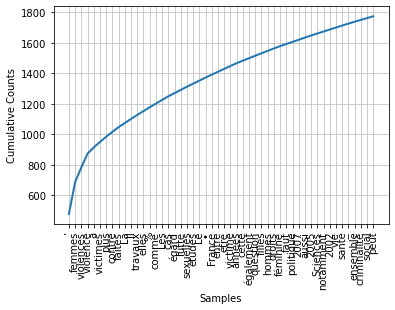

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [191]:
#cumulative frecuency of the 50 most frequently used words
fdist2.plot(50,cumulative=True)

When the word count is made, we can see that indeed the word "femmes" and "violence" are the most common ones.This, however, is not a surprise given the titles of the texts and the main topic they talk about. Further, other words like "victimes", "sexualité", "politique" and "crime" confirm the intuitions from the concordance instruction. As  so we start to see that text describes the relation between violence and women and the role of society in the setting of this relationship.

In [192]:
#how to get long word?
V = set(tokens_without_sw)
long_words=[w for w in V if len(w) > 15]
sorted(long_words)

['-union_6158335_3232html',
 '201494dossierLes',
 '201495dossierViolences',
 '201496dossierLes',
 '201497dossierViolences',
 '201498dossierLes',
 '8Comparativement',
 'CAMPAGNEPourquoi',
 'Ined-Inserm-ANRS',
 'Masculin/Féminin',
 'Seine-Saint-Denis',
 'agressives…Elles',
 'anthropologiques',
 'anti-rapprochement',
 'bibliographiques',
 'caractéristiques',
 'contactSophieSIMON',
 'cyber-harcèlement',
 'cybersurveillance',
 'dAuvergne-Rhône-Alpes',
 'dévalorisations…',
 'fillesParallèlement',
 'historiographique',
 'https//doiorg/104000/champpenal8102',
 'https//wwwlemondefr/idees/article/2023/01/18/vi',
 'individualisée/psychologisée',
 'infranchissables',
 'institutionnalisation',
 'institutionnelle',
 'interculturelles',
 'interdisciplinai',
 'interdisciplinaire',
 'interministériel',
 'interministérielle',
 'interprèteAttention',
 'intersectionnalité',
 'interuniversitaire',
 'juridictionnelle',
 'miprofgouvfrSophie',
 'naturalisée/sexualisée',
 'particulièrement',
 'plusEnsemble1211

Among these high frequency words, the long ones highlight new subtopics around the text, new "environments" in which the violence may be taking place: as "cyber-space". As well it highlights a derivation from the word Psychology suggesting the discussions about the physiological impact of the violence.

In sum, we will focus on the next words:
<ol>
    <li>Femmes</li>
    <li>Violence</li>
    <li>Victime</li>
    <li>Politique</li>
    <li>Psychology</li>
</ol>

#### 2.3  Word cohincidence 

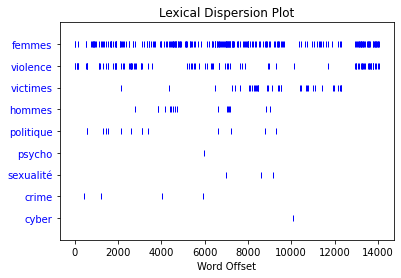

In [193]:
#How to get a prositional ninformaiton of a word in a text?
text_8.dispersion_plot(["femmes","violence","victimes","hommes","politique", "psycho","sexualité","crime","cyber"])

As expected, knowing that this texts speacks about the women, the word femmes papprers all along the text, whoever, it appearens is often linked ot the word violence, that apprears with a preocuppating simunltanity.This Relationship wolds for the word Victimes> Never the less, it is important to see that the words victime and violence are substitutes. In this sense we can conclude that in general, the violence is victimizing women ( with would explain also the hig frequency of the preoposition "contre").

In [194]:
#Stemming
tokens_without_sw_stem=[]
stemmer = FrenchStemmer()
for n in range(len(tokens_without_sw)):
    stemmy=stemmer.stem(tokens_without_sw[n])
    tokens_without_sw_stem.append(stemmy)

In [195]:
#lemming
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
words = tokens_without_sw_stem
tokens_without_sw_lemm=[]
for word in words:
    lemmy=lemmatizer.lemmatize(word)
    tokens_without_sw_lemm.append(lemmy)    

#### 2.4 Context analysis of keywords

In [206]:
# Load the text in French
text = " ".join(tokens_without_sw_stem)
tok_text=nltk.Text(text)

In [212]:
#and colocations(setings of two word that , in case one if remplaced by the other, the expression wil change its sense)?
text_8.collocations()

des femmes; faites aux; violences faites; lutte contre; aux femmes;
les femmes; égard des; 20/01/2023 sur; sur www.cairn.info; sur les;
les violences; contre les; vio -lences; des droits; des filles;
violences conjugales; des violences; affaires familiales; l'égard des;
par rapport


The context analysis, starting buy the binary collocations,does not give useful. Let's chekck the similarities

In [43]:
text_8.similar("femmes")

victimes années travaux filles hommes recherches violences mythes
droits sécurité recherche études ouvrages cas mères savoirs
changements réponses faits associations


In [44]:
text_8.similar("violence")

criminalité déviance france délinquance situation victime formation
recherche en est vivacité trentaine réunir genre place sexualité
police politique criminologie violences


In [45]:
text_8.similar("victime")

violence criminologie cause santé prévention sensibilisation à revue
description france par police justice sociologie criminalité pas
naissance déviance problématisation question


In [46]:
text_8.similar("Politique")

violence en trentaine domestique série contre situation prise
tentative batterie mobilisation proposition ordonnance augmentation


The similarity search, in contrast, suggests that while the word femmes is highly associated with the concepts of violence and "victims" once again the word filles is associated, suggesting that, whatever is happening it affects as well the girls. 
The violence word, as expected, is linked to delinquency or crime, but also sets the emplacement of it: Gender, sexuality, politics.
The similarities for the words victime and politique are not helping.
It is worth to mention that the search highlights one of the ethical problems of the NLP: Femmes is associated with "meres" Nevertheless this association can take sense recalling that intra households similar words were highlighted in the word-count.This may suggest some kind of violence inside the household affecting directly mothers.

## 3. Wordcloud

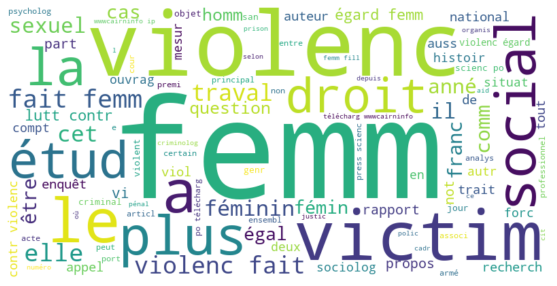

In [129]:

# Create a WordCloud object with French settings
wordcloud = WordCloud(background_color="white", contour_color="gray", contour_width=1, stopwords=set(), width=800, height=400, max_words=100).generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


## 4. Sentiment Analysis

In [134]:
from textblob import TextBlob

# Create a TextBlob object
blob = TextBlob(text)

# Get the sentiment polarity (-1 to 1, where -1 is negative and 1 is positive)
sentiment_polarity = blob.sentiment.polarity

# Print the sentiment polarity
print("Sentiment Polarity: {:.2f}".format(sentiment_polarity))

# Determine the sentiment based on polarity threshold
if sentiment_polarity > 0:
    sentiment = "Positive"
elif sentiment_polarity == 0:
    sentiment = "Neutral"
else:
    sentiment = "Negative"

# Print the sentiment
print("Sentiment: {}".format(sentiment))

Sentiment Polarity: -0.03
Sentiment: Negative


One of the most common analysis in NLP is the sentiment analysis. Whe whe run thi for the text as a whole, We can see that the added text expresses majoritarily negative feelings in the sentences they used. Given that we know that the main topic in these texts is the violence, it reveals that, globally, the violence is a phenomenon described a s negatives in the text. Nevertheless, the polarity is very close to 0, which means that a big part of the text is not necessarily describing the violence as negative. Let's evaluate the text individually to assess this thesis.

In [223]:
# Create a TextBlob object
Textos=[text1,text2,text3,text4,text5,text6,text7]  
x=0
for t in Textos:
    blob = TextBlob(t)
    x=x+1
    print("text",x,":")
    # Find occurrences of the word "violence" in the text
    word = "violence"
    word_count = blob.words.count(word)

    if word_count > 0:
        # Get the sentiment polarity for the word "violence"
        word_polarity = sum([blob.sentiment.polarity for word in blob.words if word == "violence"])

        # Print the sentiment polarity for the word "violence"
        print("Sentiment Polarity for the word 'violence': {:.2f}".format(word_polarity))

        # Determine the sentiment based on polarity threshold
        if word_polarity > 0:
            sentiment = "Positive"
        elif word_polarity == 0:
            sentiment = "Neutral"
        else:
            sentiment = "Negative"

        # Print the sentiment for the word "violence"
        print("Sentiment for the word 'violence': {}".format(sentiment))
    else:
        print("The word 'violence' does not occur in the input text.")


text 1 :
Sentiment Polarity for the word 'violence': 1.13
Sentiment for the word 'violence': Positive
text 2 :
Sentiment Polarity for the word 'violence': 0.99
Sentiment for the word 'violence': Positive
text 3 :
Sentiment Polarity for the word 'violence': 0.09
Sentiment for the word 'violence': Positive
text 4 :
The word 'violence' does not occur in the input text.
text 5 :
Sentiment Polarity for the word 'violence': -0.13
Sentiment for the word 'violence': Negative
text 6 :
The word 'violence' does not occur in the input text.
text 7 :
Sentiment Polarity for the word 'violence': -2.61
Sentiment for the word 'violence': Negative


In [225]:
# Create a TextBlob object
Textos=[text1,text2,text3,text4,text5,text6,text7]  
x=0
for t in Textos:
    blob = TextBlob(t)
    x=x+1
    print("text",x,":")
    # Find occurrences of the word "violence" in the text
    word = "femmes"
    word_count = blob.words.count(word)

    if word_count > 0:
        # Get the sentiment polarity for the word "violence"
        word_polarity = sum([blob.sentiment.polarity for word in blob.words if word == "femmes"])

        # Print the sentiment polarity for the word "violence"
        print("Sentiment Polarity for the word 'femmes': {:.2f}".format(word_polarity))

        # Determine the sentiment based on polarity threshold
        if word_polarity > 0:
            sentiment = "Positive"
        elif word_polarity == 0:
            sentiment = "Neutral"
        else:
            sentiment = "Negative"

        # Print the sentiment for the word "violence"
        print("Sentiment for the word 'femmes': {}".format(sentiment))
    else:
        print("The word 'violence' does not occur in the input text.")


text 1 :
Sentiment Polarity for the word 'femmes': 2.06
Sentiment for the word 'femmes': Positive
text 2 :
Sentiment Polarity for the word 'femmes': 5.09
Sentiment for the word 'femmes': Positive
text 3 :
Sentiment Polarity for the word 'femmes': 0.28
Sentiment for the word 'femmes': Positive
text 4 :
Sentiment Polarity for the word 'femmes': -1.47
Sentiment for the word 'femmes': Negative
text 5 :
Sentiment Polarity for the word 'femmes': -0.67
Sentiment for the word 'femmes': Negative
text 6 :
The word 'violence' does not occur in the input text.
text 7 :
Sentiment Polarity for the word 'femmes': -3.49
Sentiment for the word 'femmes': Negative


In [226]:
# Create a TextBlob object
Textos=[text1,text2,text3,text4,text5,text6,text7]  
x=0
for t in Textos:
    blob = TextBlob(t)
    x=x+1
    print("text",x,":")
    # Find occurrences of the word "violence" in the text
    word = "victimes"
    word_count = blob.words.count(word)

    if word_count > 0:
        # Get the sentiment polarity for the word "violence"
        word_polarity = sum([blob.sentiment.polarity for word in blob.words if word == "victimes"])

        # Print the sentiment polarity for the word "violence"
        print("Sentiment Polarity for the word 'victimes': {:.2f}".format(word_polarity))

        # Determine the sentiment based on polarity threshold
        if word_polarity > 0:
            sentiment = "Positive"
        elif word_polarity == 0:
            sentiment = "Neutral"
        else:
            sentiment = "Negative"

        # Print the sentiment for the word "violence"
        print("Sentiment for the word 'victimes': {}".format(sentiment))
    else:
        print("The word 'violence' does not occur in the input text.")


text 1 :
Sentiment Polarity for the word 'victimes': 0.04
Sentiment for the word 'victimes': Positive
text 2 :
Sentiment Polarity for the word 'victimes': 1.52
Sentiment for the word 'victimes': Positive
text 3 :
Sentiment Polarity for the word 'victimes': 0.37
Sentiment for the word 'victimes': Positive
text 4 :
Sentiment Polarity for the word 'victimes': -0.65
Sentiment for the word 'victimes': Negative
text 5 :
Sentiment Polarity for the word 'victimes': -0.80
Sentiment for the word 'victimes': Negative
text 6 :
The word 'violence' does not occur in the input text.
text 7 :
The word 'violence' does not occur in the input text.


When the texts are examined in detail, we can see that the first 3 texts have a positive, while in the rest it is possible to see a negative attitude towards the violence, femmes and victimes simutaneusly (this hoolds for the negative results in all the cases except for the 7th text). The question would be why. In this regard, it is proposed to run the following test: 
trace the relationships between the words " violence" and Femmes".

In [165]:
#Example of linguistic analysis ( stylistics)
Textos=[text_1,text_2,text_3,text_4,text_5,text_6,text_7]  
x=0
for t in Textos:
    x=x+1
    print("text",x,":")
    fdist = nltk.FreqDist([w.lower() for w in t])
    modals=['par', "contre",""]
    for m in modals:
        print(m+':',fdist[m])

text 1 :
par: 27
contre: 1
text 2 :
par: 18
contre: 17
text 3 :
par: 6
contre: 2
text 4 :
par: 7
contre: 3
text 5 :
par: 10
contre: 4
text 6 :
par: 5
contre: 1
text 7 :
par: 6
contre: 4


In this exercise it was presented to see if the word "contre"or "par" which may suggest if the violence is executed against or by the women may give any clue. However no relationship was found, may be given that par can be used in much more contexts than the execution of the  violence.
In this case, it is shown how sentiment analysis is not a powerful tool for analyzing these specific texts.

## 4. Conclusions

As seen, the  scanning of the text using common NLP technique as tokenization for finding word distribution , the identification of collocations and similarities, a contest analysis and even an a sentiment one showed that the text develops the  relation between the violence and the women. Given the high frequency of the word “ contre” we can assume that the violence is being executed against the female dignity. 
This can be supported by the presence of the word “ victime” which serves as a substitute of the notion of “violence” itself. 
These other high frequency words may suggest that this violence is embodied in psychological, cybernetic,sexual or political aggressions and, with a high probability, that this phenomena has a long term occurrence. 
 Finally, there identified several terms linked to the legal consequences of these violences which implied the action of laws, trials, as social support related words .

Finally, while the sentiment analysis implies higher cost for data depuration and as so it was not effective for detecting the intentions behind the word” violence” in these texts, it was able to suggest that the text is not talking about a “happy” topic. Nevertheless, the grammatical and lexical analysis permitted us to approach with a higher precision the goal of this texts.